# Import 

In [2]:
import pandas as pd
import tensorflow
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, TimeDistributed, Dense,Dropout,Activation,Conv2D,Reshape
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.utils import *
import math
import time
import matplotlib.pyplot as plt

/home/ubuntu/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Read Date

In [3]:
df = pd.read_csv('data/2330+Us.csv' , encoding='big5')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1661 entries, 0 to 1660
Data columns (total 21 columns):
Date         1661 non-null object
Open         1661 non-null float64
High         1661 non-null float64
Low          1661 non-null float64
Close        1661 non-null float64
SMA5         1661 non-null float64
SMA10        1661 non-null float64
SMA20        1661 non-null float64
SMA60        1661 non-null float64
Vol          1661 non-null int64
MA5          1661 non-null int64
MA10         1661 non-null int64
DIF          1661 non-null float64
MACD9        1661 non-null float64
OSC          1661 non-null float64
K            1661 non-null object
D            1661 non-null object
S_P500       1661 non-null float64
SOXX         1661 non-null float64
ADR          1661 non-null float64
TaiwanAll    1661 non-null float64
dtypes: float64(15), int64(3), object(3)
memory usage: 272.6+ KB


In [5]:
df['K'] = df['K'].str.replace('%','').astype('float')
df['D'] = df['D'].str.replace('%','').astype('float')
    

In [6]:
# plt.figure(figsize = (15,5))
# plt.plot(df2.Close.values , color='red' , label='Close')
# plt.plot(df2.MACD9.values , color='blue' , label='MACD9')
# plt.plot(df2.SMA5.values , color='green' , label= 'SMA5')
# plt.plot(df2.SMA10.values , color='black' , label='SMA10')
# plt.plot(df2.K.values , color='yellow' , label='K')
# plt.plot(df2.D.values , color='grey' , label='D')

# plt.title('2330')
# plt.xlabel('Days')
# plt.ylabel('price')
# plt.legend(loc='best')
# plt.show()

No handles with labels found to put in legend.


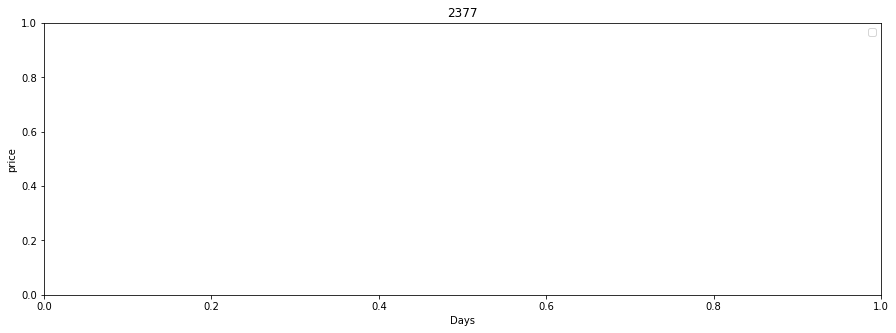

In [7]:
plt.figure(figsize = (15,5))


plt.title('2377')
plt.xlabel('Days')
plt.ylabel('price')
plt.legend(loc='best')
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 22 columns):
時間             841 non-null object
Open           841 non-null float64
High           841 non-null float64
Low            841 non-null float64
Close          841 non-null float64
SMA5           841 non-null float64
SMA10          841 non-null float64
SMA20          841 non-null float64
SMA60          841 non-null float64
Vol            841 non-null int64
MA5            841 non-null int64
MA10           841 non-null int64
DIF            841 non-null float64
MACD9          841 non-null float64
OSC            841 non-null float64
K              841 non-null float64
D              841 non-null float64
RSIx6          841 non-null object
RSIx12         841 non-null object
BBand width    841 non-null object
Band%EMA3      841 non-null object
TaiwanAll      841 non-null float64
dtypes: float64(14), int64(3), object(5)
memory usage: 144.6+ KB


In [8]:
df = pd.read_csv('data/2330+Us.csv' , encoding='big5')

In [9]:
df.tail(10)

,Date,Open,High,Low,Close,SMA5,SMA10,SMA20,SMA60,Vol,...,MA10,DIF,MACD9,OSC,K,D,S_P500,SOXX,ADR,TaiwanAll
1651,2018/3/31,247.5,249.0,246.5,247.5,246.7,247.90,250.55,246.70,3604,...,29283,-0.18,0.63,-0.82,34.38%,33.22%,2640.87,1328.90,43.759998,10919.49
1652,2018/4/2,248.5,249.0,245.0,246.5,245.8,247.25,250.38,247.04,19029,...,28952,-0.28,0.45,-0.73,35.74%,34.06%,2640.87,1328.90,43.759998,10888.27
1653,2018/4/3,243.0,244.5,242.0,244.0,245.6,246.40,250.23,247.28,35814,...,29236,-0.60,0.24,-0.84,32.60%,33.57%,2581.88,1277.01,42.500000,10821.53
1654,2018/4/9,248.0,248.0,243.5,245.0,245.8,245.75,250.00,247.49,35466,...,30082,-0.70,0.05,-0.76,34.01%,33.72%,2614.45,1302.09,43.480000,10893.53
1655,2018/4/10,244.5,249.0,243.5,245.5,245.7,245.80,249.75,247.63,25269,...,27312,-0.74,-0.11,-0.63,35.64%,34.36%,2613.16,1273.80,43.070000,10927.18
1656,2018/4/11,246.5,248.5,246.5,248.0,245.8,246.25,249.45,247.78,21778,...,25541,-0.61,-0.21,-0.40,50.43%,39.72%,2656.87,1314.54,43.580002,10974.02
1657,2018/4/12,248.5,248.5,244.0,245.0,245.5,245.65,248.75,247.86,20477,...,24478,-0.67,-0.30,-0.37,46.95%,42.13%,2642.19,1315.06,43.380001,10955.29
1658,2018/4/13,246.0,246.0,244.0,244.5,245.6,245.60,248.13,247.90,19947,...,23481,-0.78,-0.39,-0.38,42.41%,42.22%,2663.99,1339.66,43.849998,10965.39
1659,2018/4/16,243.0,244.0,242.0,243.5,245.3,245.55,247.55,247.93,21609,...,21999,-0.97,-0.51,-0.46,35.42%,39.95%,2656.30,1329.40,42.650002,10954.55
1660,2018/4/17,243.0,243.5,237.5,238.0,243.8,244.75,246.70,247.95,42756,...,24575,-1.43,-0.70,-0.74,25.06%,34.99%,2677.84,1332.52,42.869999,10810.45


In [10]:
def batch_data( time_steps,sd,batch_size,feature_list):

    df = pd.read_csv('data/2377.csv' , encoding='big5')
#     print(df.shape)
#     df=df[:-7]
#     print(df.shape)
    df['RSI6'] = df['RSIx6'].str.replace('%','').astype('float') 
    df['RSI6'] = df['RSI6'] * 0.01
    df['RSI12'] = df['RSIx12'].str.replace('%','').astype('float') 
    df['RSI12'] = df['RSI12'] * 0.01
    
    
#     del df['Date']
#     del df['DIF']
#     del df['K']
#     del df['D']
#     del df['MACD9']
#     del df['OSC']
#     del df['SMA60']
#     del df['MA10']
#     del df['MA5']
#     del df['SMA20']
#     del df['SMA10']

    #_data = df.drop(['Date'],['DIF'],['K'],['D'],['MACD9'],['OSC'], axis=1)
    #df.drop(['Date'],axis=1)
    # df.drop(['DIF'],axis=1)
    # df.drop(['K'],axis=1)
    # df.drop(['D'],axis=1)
    # df.drop(['MACD9'],axis=1)
    # df.drop(['OSC'],axis=1)
    df['K'] = df['K'].str.replace('%','').astype('float')
    df['K'] = df['K'] * 0.01
    
    df['D'] = df['D'].str.replace('%','').astype('float')
    df['D'] = df['D'] * 0.01

    df['Vol']= df['Vol'].astype('float')
    df['Open'] = df['Open'].astype('float')
    df['High'] = df['High'].astype('float')
    df['Low'] = df['Low'].astype('float')
    df['Close'] = df['Close'].astype('float')
    df['SMA5'] = df['SMA5'].astype('float')
    df['SMA10'] = df['SMA10'].astype('float')
    df['SMA20'] = df['SMA20'].astype('float')
    df['SMA60'] = df['SMA60'].astype('float')
    df['MA5'] = df['MA5'].astype('float')
    df['MA10'] = df['MA10'].astype('float')
    
    
#     sd = -1
    close = df['Close']
    s = 0.07
    
    df['three']=((close.shift(-3)-close)/close>s).astype('int')
    df['four']=((close.shift(-4)-close)/close>s).astype('int')
    df['five']=((close.shift(-5)-close)/close>s).astype('int')
    df['six']=((close.shift(-6)-close)/close>s).astype('int')
    df['seven']=((close.shift(-7)-close)/close>s).astype('int')
    df['eight']=((close.shift(-8)-close)/close>s).astype('int')
    df['nine']=((close.shift(-9)-close)/close>s).astype('int')
    df['ten']=((close.shift(-10)-close)/close>s).astype('int')
    df['eleven']=((close.shift(-11)-close)/close>s).astype('int')
    
    df['label'] = df['three']+df['four']+df['five']+df['six']+df['seven']+df['eight']+df['nine']+df['ten']+df['eleven']
    df['label'] = (df['label']>0).astype('int')

    Y =df['label']
    Y = np_utils.to_categorical(Y)
    #first time train
    #X = df[['Vol','Open','High','Low','Close']]
    # acc 65
    
    #second
    #X = df[['Vol','Open','High','Low','Close','MA5']]
    
    #third
    #X = df[['Vol','Open','High','Low','Close','MA5','MA10']]
    
    #4
    X = df[feature_list]
    #X = df[['Vol','Open','High','Low','Close','MA5','MA10','SMA5','SMA10','SMA20']]
    

    Y = np.array(Y)
    X = np.array(X)
    
    m = MinMaxScaler(feature_range=(0,1))
    X=m.fit_transform(X)

    X_t = []
    Y_t = []
    
    
    
    
    for i in range(0, X.shape[0] - time_steps):
        

        X_t.append(X[i:i+time_steps])
        Y_t.append(Y[i+time_steps])
    X_t = np.array(X_t)
    Y_t = np.array(Y_t)
    
    dn = X_t.shape[0]%batch_size
    X_t = X_t[dn:]
    Y_t = Y_t[dn:]
    
    
      
#     X_t,Y_t=shuffle(X_t, Y_t, random_state=0)
    
    X_t_batch_train=X_t[:-batch_size]
    Y_t_batch_train=Y_t[:-batch_size]

    X_t_batch_test=X_t[-batch_size:]
    Y_t_batch_test=Y_t[-batch_size:]
    return X_t_batch_train,Y_t_batch_train,X_t_batch_test,Y_t_batch_test,df
    
    

In [11]:
df.head()

,Date,Open,High,Low,Close,SMA5,SMA10,SMA20,SMA60,Vol,...,MA10,DIF,MACD9,OSC,K,D,S_P500,SOXX,ADR,TaiwanAll
0,2011/7/20,69.7,71.7,69.4,71.6,70.08,70.83,71.79,74.02,58272,...,55917,-1.15,-1.00,-0.15,32.35%,26.05%,1326.73,397.41,12.22,8706.17
1,2011/7/21,71.4,71.6,70.6,71.6,70.26,70.83,71.66,74.05,33277,...,54470,-1.04,-1.01,-0.03,46.77%,32.96%,1325.84,395.11,12.47,8717.14
2,2011/7/22,72.4,72.4,71.7,72.0,70.68,70.78,71.62,74.04,38244,...,52998,-0.88,-0.98,0.10,60.35%,42.09%,1343.80,398.88,12.57,8765.32
3,2011/7/25,72.4,72.5,71.4,72.0,71.14,70.85,71.62,74.02,34963,...,51283,-0.76,-0.94,0.18,69.40%,51.19%,1345.02,408.56,12.98,8683.51
4,2011/7/26,72.3,73.7,72.3,73.7,72.18,71.19,71.68,74.03,53159,...,52599,-0.54,-0.86,0.32,79.60%,60.66%,1337.43,403.08,12.75,8794.24


In [12]:
df.shape

(1661, 21)

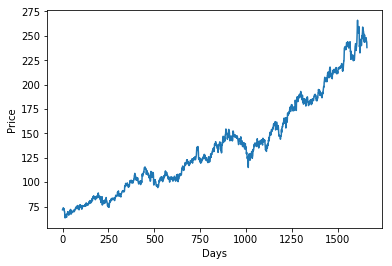

In [13]:
#dates = pd.to_datetime(df['Date'] , format='%Y%m%d')
plt.plot(df['Close'])
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

In [14]:
batch_size= 128
LR= 0.005
epoch= 1000
input_size= 6
time_steps= 6
sd = -3

In [15]:
# feature_list_try = ['SMA5', 'SMA10', 'SMA20',
#        'SMA60', 'MA5', 'MA10', 'DIF', 'MACD9', 'OSC', 'K', 'D','S_P500','SOXX','ADR']
# feature_list_try = ['S_P500','SOXX','ADR','RSI6','RSI12']
# feature_list_try = ['RSI6','TaiwanAll','RSI12','SMA5','MA5']
feature_list_try = ['TaiwanAll','RSI6','RSI12','SMA5','MA5']

new feature:  TaiwanAll


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=(128, 6, 6..., return_sequences=True, stateful=False, units=256)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=False, stateful=False, units=128)`


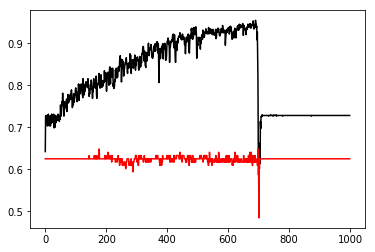

640/640 [==============================] - 0s 33us/step
train_score: [0.5851307928562164, 0.728125]
128/128 [==============================] - 0s 31us/step
test_score: [0.6880345344543457, 0.625]
new feature:  RSI6


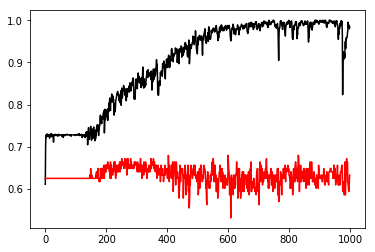

640/640 [==============================] - 0s 34us/step
train_score: [0.00648152042995207, 1.0]
128/128 [==============================] - 0s 64us/step
test_score: [4.710883617401123, 0.6328125]
new feature:  RSI12


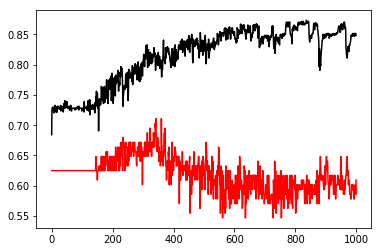

640/640 [==============================] - 0s 39us/step
train_score: [0.30521524025498364, 0.8515625]
128/128 [==============================] - 0s 51us/step
test_score: [5.548680305480957, 0.609375]
new feature:  SMA5


ResourceExhaustedError: OOM when allocating tensor with shape[256,128] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: training_3/Adam/gradients/lstm_8/while/MatMul_grad/MatMul_1 = MatMul[T=DT_FLOAT, _class=["loc:@lstm_8/while/MatMul"], transpose_a=true, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](training_3/Adam/gradients/lstm_8/while/MatMul_3_grad/MatMul_1/StackPopV2, training_3/Adam/gradients/lstm_8/while/mul_grad/Mul_1)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


Caused by op 'training_3/Adam/gradients/lstm_8/while/MatMul_grad/MatMul_1', defined at:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.6/dist-packages/tornado/platform/asyncio.py", line 112, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.6/asyncio/base_events.py", line 421, in run_forever
    self._run_once()
  File "/usr/lib/python3.6/asyncio/base_events.py", line 1426, in _run_once
    handle._run()
  File "/usr/lib/python3.6/asyncio/events.py", line 127, in _run
    self._callback(*self._args)
  File "/usr/local/lib/python3.6/dist-packages/tornado/platform/asyncio.py", line 102, in _handle_events
    handler_func(fileobj, events)
  File "/usr/local/lib/python3.6/dist-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python3.6/dist-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python3.6/dist-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-16-4fcde66aedaf>", line 33, in <module>
    train_history=model.fit(X_t_batch_train, Y_t_batch_train, epochs=epoch, batch_size=batch_size,verbose=0,validation_data=(X_t_batch_test,Y_t_batch_test),shuffle=True)
  File "/usr/local/lib/python3.6/dist-packages/keras/models.py", line 963, in fit
    validation_steps=validation_steps)
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/training.py", line 1682, in fit
    self._make_train_function()
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/training.py", line 990, in _make_train_function
    loss=self.total_loss)
  File "/usr/local/lib/python3.6/dist-packages/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/keras/optimizers.py", line 445, in get_updates
    grads = self.get_gradients(loss, params)
  File "/usr/local/lib/python3.6/dist-packages/keras/optimizers.py", line 78, in get_gradients
    grads = K.gradients(loss, params)
  File "/usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py", line 2515, in gradients
    return tf.gradients(loss, variables, colocate_gradients_with_ops=True)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gradients_impl.py", line 488, in gradients
    gate_gradients, aggregation_method, stop_gradients)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gradients_impl.py", line 625, in _GradientsHelper
    lambda: grad_fn(op, *out_grads))
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gradients_impl.py", line 379, in _MaybeCompile
    return grad_fn()  # Exit early
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gradients_impl.py", line 625, in <lambda>
    lambda: grad_fn(op, *out_grads))
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py", line 1063, in _MatMulGrad
    grad_b = gen_math_ops.mat_mul(a, grad, transpose_a=True)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gen_math_ops.py", line 4209, in mat_mul
    name=name)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/ops.py", line 3290, in create_op
    op_def=op_def)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/ops.py", line 1654, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

...which was originally created as op 'lstm_8/while/MatMul', defined at:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
[elided 21 identical lines from previous traceback]
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-16-4fcde66aedaf>", line 18, in <module>
    stateful=False,
  File "/usr/local/lib/python3.6/dist-packages/keras/models.py", line 492, in add
    output_tensor = layer(self.outputs[0])
  File "/usr/local/lib/python3.6/dist-packages/keras/layers/recurrent.py", line 499, in __call__
    return super(RNN, self).__call__(inputs, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/topology.py", line 619, in __call__
    output = self.call(inputs, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/keras/layers/recurrent.py", line 2151, in call
    initial_state=initial_state)
  File "/usr/local/lib/python3.6/dist-packages/keras/layers/recurrent.py", line 608, in call
    input_length=timesteps)
  File "/usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py", line 2767, in rnn
    swap_memory=True)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/control_flow_ops.py", line 3202, in while_loop
    result = loop_context.BuildLoop(cond, body, loop_vars, shape_invariants)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/control_flow_ops.py", line 2940, in BuildLoop
    pred, body, original_loop_vars, loop_vars, shape_invariants)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/control_flow_ops.py", line 2877, in _BuildLoop
    body_result = body(*packed_vars_for_body)
  File "/usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py", line 2753, in _step
    tuple(constants))
  File "/usr/local/lib/python3.6/dist-packages/keras/layers/recurrent.py", line 599, in step
    return self.cell.call(inputs, states, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/keras/layers/recurrent.py", line 1920, in call
    x_i = K.dot(inputs_i, self.kernel_i)
  File "/usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py", line 1075, in dot
    out = tf.matmul(x, y)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_ops.py", line 2108, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gen_math_ops.py", line 4209, in mat_mul
    name=name)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[256,128] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: training_3/Adam/gradients/lstm_8/while/MatMul_grad/MatMul_1 = MatMul[T=DT_FLOAT, _class=["loc:@lstm_8/while/MatMul"], transpose_a=true, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](training_3/Adam/gradients/lstm_8/while/MatMul_3_grad/MatMul_1/StackPopV2, training_3/Adam/gradients/lstm_8/while/mul_grad/Mul_1)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.



In [16]:

for i in range(len(feature_list_try)):
    feature_list = ['Open', 'High', 'Low', 'Close','Vol']
    feature_list.append(feature_list_try[i])
    input_size = len(feature_list)
    print('new feature: ',feature_list_try[i])
    model =Sequential()
    model.add(LSTM(
                batch_input_shape=(batch_size,time_steps,input_size),
                output_dim=256,
                return_sequences=True,
                stateful=False,
            ))
    model.add(Dropout(0.6))
    model.add(LSTM(
            output_dim=128,
                return_sequences=False,
                stateful=False,
             ))
    model.add(Dropout(0.6))
    model.add(Dense(256))
    model.add(Dropout(0.4))
    model.add(Dense(128))
    model.add(Dropout(0.4))
    model.add(Dense(64))
    model.add(Dropout(0.4))
    model.add(Dense(2,activation='softmax'))
    adam = Adam(LR)
    #     model.summary()
    model.compile(optimizer=adam,
                      loss='categorical_crossentropy',metrics=['accuracy'])
    X_t_batch_train,Y_t_batch_train,X_t_batch_test,Y_t_batch_test,df=batch_data(time_steps,-sd,batch_size,feature_list)
    train_history=model.fit(X_t_batch_train, Y_t_batch_train, epochs=epoch, batch_size=batch_size,verbose=0,validation_data=(X_t_batch_test,Y_t_batch_test),shuffle=True)
    plt.plot(train_history.history['acc'],color='black')
    plt.plot(train_history.history['val_acc'],color='red')
    plt.show()

    score = model.evaluate(X_t_batch_train,Y_t_batch_train, verbose=1,batch_size=128)
    print('train_score:', score)
    score = model.evaluate(X_t_batch_test,Y_t_batch_test, verbose=1,batch_size=128)
    print('test_score:', score)

In [ ]:
df.info()

In [34]:
df.tail

<bound method NDFrame.tail of              時間    Open    High     Low   Close    SMA5  SMA10  SMA20  SMA60  \
0     2014/11/7   38.20   38.85   37.90   38.80   38.57  37.58  37.10  39.34   
1    2014/11/10   39.15   39.45   38.65   38.65   38.50  37.89  37.25  39.29   
2    2014/11/11   38.65   39.00   38.40   38.70   38.44  38.15  37.34  39.24   
3    2014/11/12   38.60   38.80   37.65   37.70   38.33  38.19  37.41  39.16   
4    2014/11/13   37.00   37.40   35.65   36.30   38.03  38.14  37.42  39.04   
5    2014/11/14   36.30   36.70   35.80   36.50   37.57  38.07  37.40  38.94   
6    2014/11/17   36.50   36.50   35.50   35.50   36.94  37.72  37.30  38.86   
7    2014/11/18   35.50   35.75   33.20   33.50   35.90  37.17  37.14  38.73   
8    2014/11/19   33.50   34.50   33.50   33.95   35.15  36.74  36.98  38.60   
9    2014/11/20   34.05   34.45   34.00   34.00   34.69  36.36  36.84  38.46   
10   2014/11/21   34.10   34.80   34.10   34.50   34.29  35.93  36.75  38.34   
11   2014/

In [21]:
df = pd.read_csv('data/2330+Us.csv' , encoding='big5')
df_val = df[-batch_size:]

In [22]:
predictions = Y_t_batch_test[:,1]

In [23]:
df_val.iloc[0]

Date         2017/10/3
Open               219
High               223
Low                219
Close            222.5
SMA5               218
SMA10           217.55
SMA20            218.2
SMA60           215.86
Vol              38331
MA5              25303
MA10             23488
DIF               0.66
MACD9             0.61
OSC               0.05
K               59.02%
D               41.23%
S_P500         2534.58
SOXX           1182.43
ADR              38.44
TaiwanAll      10469.4
Name: 1533, dtype: object

In [33]:
holding = 0

trade_record=[]
profit=[]
for i in range(len(predictions)):
    prediction = predictions[i]
    price = float(df_val.iloc[i]['Close'])
    K = float(df_val.iloc[i]['K'].replace('%',''))
    D = float(df_val.iloc[i]['D'].replace('%',''))
#     RSI = float(df_val.iloc[i]['RSIx6'].replace('%',''))
    
    if holding == 0:
        if prediction ==1 or (K<30 and D<30)  :
            p_d = [price,i,'BUY']
            trade_record.append(p_d)
            holding=1
            continue
    if holding ==1:
        last_trade = trade_record[-1]
        if last_trade[2]=='BUY':
            buy_price=last_trade[0]
            buy_i = last_trade[1]
            if (price/buy_price-1)>0.07 or i-buy_i>=14  or (K>70 and D>70) :
                print('++++++')
                print(i-buy_i)
#                 print((buy_i-i))eleven
                p_d_s=[price,i,'SELL']
                trade_record.append(p_d_s)
                holding=0
                profit.append(price-buy_price)

----
59.02 41.23
++++++
4
----
92.86 80.88
++++++
1
----
53.1 62.79
++++++
14
----
25.97 29.62
++++++
14
----
45.57 44.18
++++++
7
----
84.47 85.36
++++++
1
----
66.74 76.63
++++++
2
----
78.82 75.5
++++++
1
----
88.68 81.57
++++++
1
----
94.59 88.2
++++++
1
----
32.68 45.63
++++++
14
----
80.39 71.56
++++++
1
----
89.94 80.65
++++++
1
----
86.15 84.57
++++++
1
----
77.0 81.23
++++++
14


In [34]:
sum(profit)

34.0

In [35]:
trade_record

[[222.5, 0, 'BUY'],
 [237.5, 4, 'SELL'],
 [237.5, 5, 'BUY'],
 [238.0, 6, 'SELL'],
 [239.0, 15, 'BUY'],
 [238.0, 29, 'SELL'],
 [229.5, 42, 'BUY'],
 [228.5, 56, 'SELL'],
 [226.0, 57, 'BUY'],
 [240.0, 64, 'SELL'],
 [236.5, 67, 'BUY'],
 [235.0, 68, 'SELL'],
 [237.0, 69, 'BUY'],
 [240.5, 71, 'SELL'],
 [242.0, 72, 'BUY'],
 [248.5, 73, 'SELL'],
 [255.5, 74, 'BUY'],
 [261.5, 75, 'SELL'],
 [266.0, 76, 'BUY'],
 [258.0, 77, 'SELL'],
 [239.0, 86, 'BUY'],
 [247.0, 100, 'SELL'],
 [250.5, 102, 'BUY'],
 [254.0, 103, 'SELL'],
 [259.0, 104, 'BUY'],
 [257.0, 105, 'SELL'],
 [255.0, 106, 'BUY'],
 [255.0, 107, 'SELL'],
 [255.0, 108, 'BUY'],
 [245.5, 122, 'SELL']]

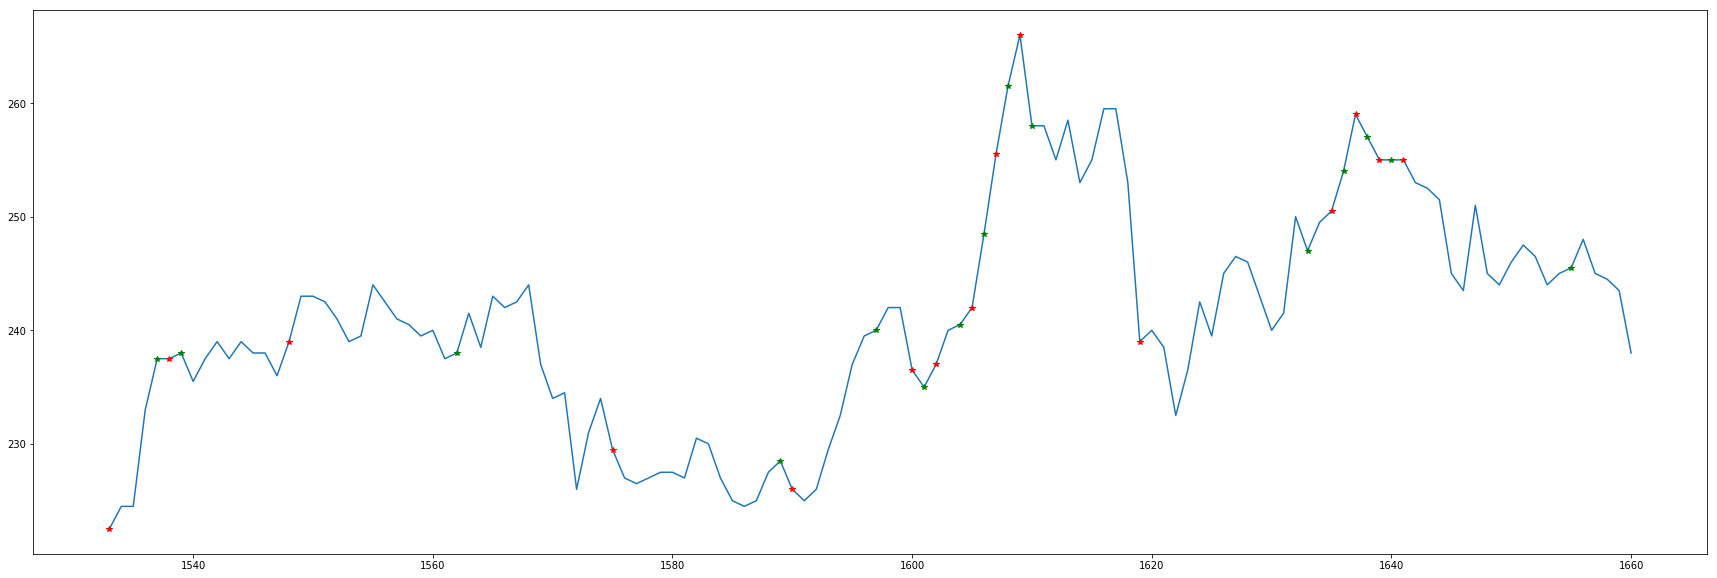

In [36]:
start = df_val['Close'].index[0]
plt.figure(figsize = (30,10))
plt.plot(df_val['Close'])
for i in trade_record:
    x=i[1]+start
    y = i[0]
    action = i[2]
    if action=='BUY':
        plt.plot(x,y,color='red',marker='*')
    else:
        plt.plot(x,y,color='green',marker='*')